# Homework 8: Phase Portraits and Cycles

***
### Academic honesty statement

**SANTIAGO ORTIZ LAVERDE**

- I state that I worked alone on this assignment. Therefore, I take full responsibility for the academic integrity of the work presented below.
***

## Problem 2: Cycles in Glycolysis

Glycolysis is how cells breakdown sugars to produce energy and the concentrations of many proteins and molecules involved in this process have been shown to wax and wane over periods of time. Sel'kov proposed a simple model of glycolysis:

\begin{align}
\dot{x} = -x+ay+x^2y\\
\dot{y} = b - ay - x^2y\\
\end{align}

where x and y are nondimensionalized forms of ADP, F6P (a phosphate) and a,b > 0 are kinetic parameters. Let's explore the system dynamics for two scenarios.

### 2.1 First task
Let a = .15 and b = 1.2. Construct a phase portrait of the system and be sure to include trajectories for ($x_0$, $y_0$) = (1,1) and (2,2).

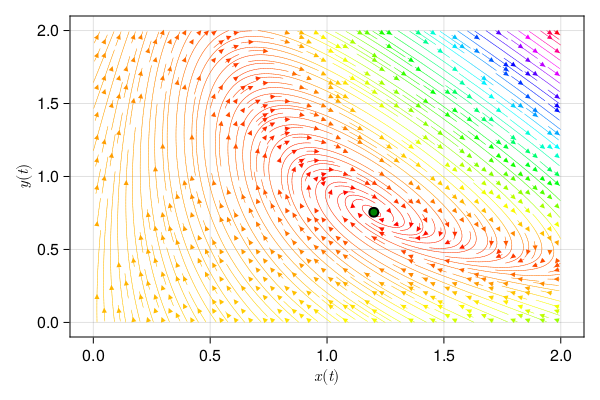

In [1]:
using CairoMakie, LaTeXStrings, NLsolve

function glycolysis(x, y; a=0.15, b=1.2)
    dxdt = -x + a*y + x^2*y
    dydt = b - a*y - x^2*y
    return Point2f(dxdt, dydt)
end

odesystem(x, y) = glycolysis(x, y);

fig = Figure(resolution = (600, 400))
ax = Axis(fig[1, 1], xlabel=L"x(t)", ylabel=L"y(t)", backgroundcolor=:white)
streamplot!(ax, odesystem, 0.0..2.0, 0.0..2.0, colormap = :hsv,
            gridsize = (64, 64), arrow_size=7.0, linewidth = 0.5); fig # Reverse(:jet)

function glycolysis!(F, x; a=0.15, b=1.2)
    F[1] = -x[1] + a*x[2] + x[1]^2*x[2]
    F[2] = b - a*x[2] - x[1]^2*x[2]
end

results = nlsolve((F, x)->glycolysis!(F, x), [0.0, 0.0])
zero = results.zero;
scatter!(ax, [zero[1]], [zero[2]]; color=:green, markersize=12.5, strokewidth=2., marker=:circle); fig

### 2.2 Second task
In the *text cell* below, describe the system dynamics you observed based on the last phase portrait.

<div class="alert alert-block alert-info">
<b> All initial conditions converge to the same steady state in the form of a spiral (oscillatory behavior). The latter means that if we perform a local analysis with eigenvalues, we will obtain an exponential decay towards a stable steady. Therefore, eigenvalues are complex with a negative real part.</b>
</div>

### 2.3 Third task
Let a = 0.04 and b = 0.6. Construct a phase portrait of the system and be sure to include trajectories for (x_0,y_0) = (1,1) and (2,2).

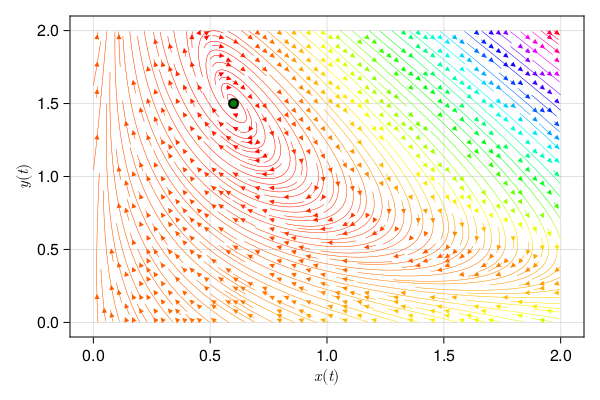

In [2]:
odesystem(x, y) = glycolysis(x, y; a=0.04, b=0.6);

fig = Figure(resolution = (600, 400))
ax = Axis(fig[1, 1], xlabel=L"x(t)", ylabel=L"y(t)", backgroundcolor=:white)
streamplot!(ax, odesystem, 0.0..2.0, 0.0..2.0, colormap = :hsv,
            gridsize = (64, 64), arrow_size=7.0, linewidth = 0.5); fig # Reverse(:jet)

results = nlsolve((F, x)->glycolysis!(F, x; a=0.04, b=0.6), [0.0, 0.0])
zero = results.zero;
scatter!(ax, [zero[1]], [zero[2]]; color=:green, markersize=12.5, strokewidth=2., marker=:circle); fig

### 1.4 Fourth task
In the *text cell* below, describe the system dynamics you observed based on the last phase portrait.

<div class="alert alert-block alert-info">
<b> All initial conditions/points move away from the equilibrium point in an oscillatory manner (spiral). The latter means that if we perform a local analysis with eigenvalues, we will obtain exponential growth and an unstable steady state. Therefore, eigenvalues are complex with a positive real part.</b>
</div>

### 1.5 Fifth task
We have seen that steadystates with complex eigenvalues with negative real parts are oscillatory and stable. How does the dynamics of a system near a steadystate with negative real-part, complex eigenvalues differ from a limit cycle? Explain in a text cell below.

<div class="alert alert-block alert-info">
<b> Initial conditions that end up trapped in infinite cycles (limit cycles) present an oscillatory behavior that is neither decreasing nor ascending (no exponential growth/decay). Therefore, we will obtain imaginary eigenvalues (no real part) if we perform a local analysis with eigenvalues at a limit cycle.</b>
</div>

***